<a href="https://colab.research.google.com/github/paulmachau/Loan-Prediction/blob/main/Loan_Eligibility_Predictiond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# prompt: provide a code to read the train and test csv files

# Read the train CSV file
train_data = pd.read_csv('/content/train.csv')

# Read the test CSV file
test_data = pd.read_csv('/content/test.csv')


In [6]:
# prompt: view the variables in the train dataset

train_data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# prompt: Using dataframe train_data: view the information within the train Dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# prompt: describing the train dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Inference
* The code above provides an out put on the mean, standard deviation and the percentiles within the dataset

In [10]:
# prompt: Get the unique values and their frequency of variable Property_Area

train_data['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Distribution of non numerical Variables and understanding their distribution in numerical values

In [11]:
# prompt: checking for missing values

train_data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Create a copy of the dataset to preserve the original
cleaned_train_data = train_data.copy()

# Remove missing values from columns except 'Loan_ID'
cleaned_train_data.dropna(subset=cleaned_train_data.columns.difference(['Loan_ID']), inplace=True)

# Reset index after dropping rows
cleaned_train_data.reset_index(drop=True, inplace=True)

# Check the new shape of the dataset
print("Shape after removing missing values:", cleaned_train_data.shape)

cleaned_train_data.head(10)

Shape after removing missing values: (614, 6)


,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP001002,Graduate,5849.0,0.0,Urban,Y
1,LP001003,Graduate,4583.0,1508.0,Rural,N
2,LP001005,Graduate,3000.0,0.0,Urban,Y
3,LP001006,Not Graduate,2583.0,2358.0,Urban,Y
4,LP001008,Graduate,6000.0,0.0,Urban,Y
5,LP001011,Graduate,5417.0,4196.0,Urban,Y
6,LP001013,Not Graduate,2333.0,1516.0,Urban,Y
7,LP001014,Graduate,3036.0,2504.0,Semiurban,N
8,LP001018,Graduate,4006.0,1526.0,Urban,Y
9,LP001020,Graduate,12841.0,10968.0,Semiurban,N


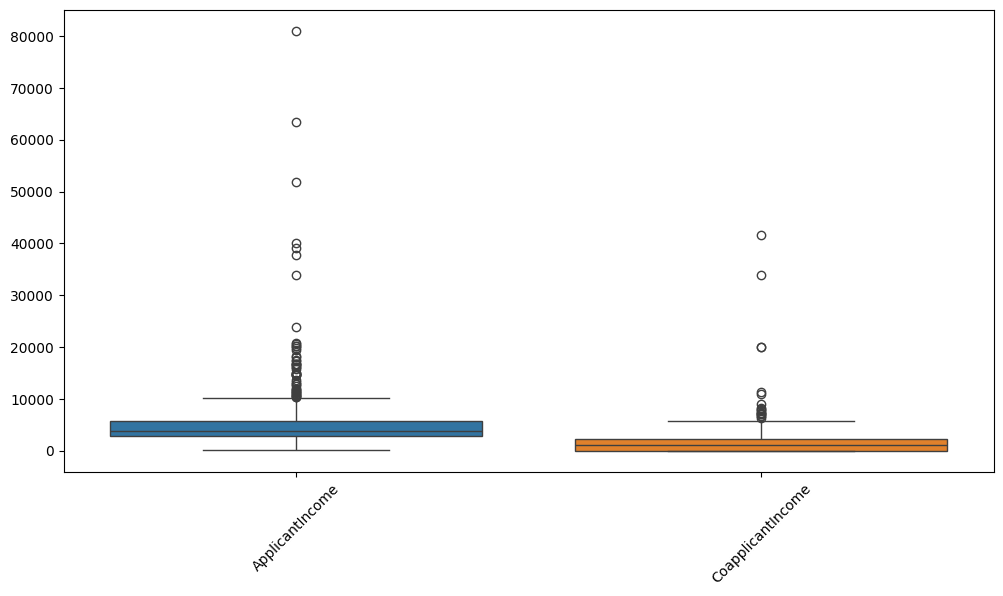

In [18]:
# prompt: checking  for outliers and plotting a Box plot as a visual

# Check for outliers using a box plot
plt.figure(figsize=(12,6))
sn.boxplot(data=cleaned_train_data, orient="v")
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-ffe9b461d979>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = cleaned_train_data.quantile(0.25)
<ipython-input-19-ffe9b461d979>:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = cleaned_train_data.quantile(0.75)
<ipython-input-19-ffe9b461d979>:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_train_data = cleaned_train_data[(cleaned_train_data >= lower_bound) & (cleaned_train_data <= upper_bound)]


Shape after removing outliers: (614, 6)


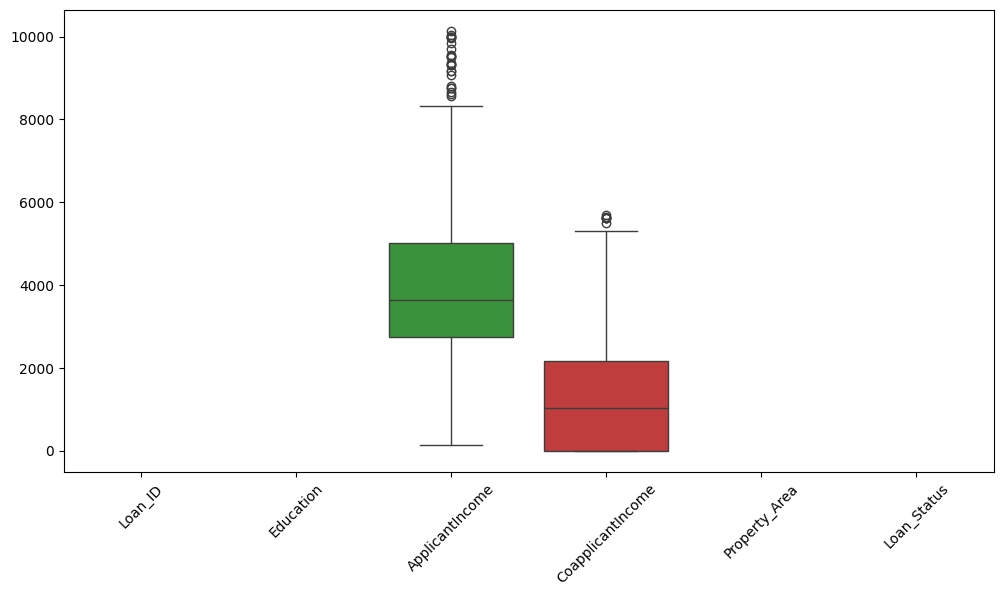

In [19]:
# prompt: Removing outliers and craeting a visual using Box plpot

# Removing Outliers
# Using IQR

# Calculate the IQR for each numerical column
Q1 = cleaned_train_data.quantile(0.25)
Q3 = cleaned_train_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
cleaned_train_data = cleaned_train_data[(cleaned_train_data >= lower_bound) & (cleaned_train_data <= upper_bound)]

# Reset index after removing outliers
cleaned_train_data.reset_index(drop=True, inplace=True)

# Check the new shape of the dataset
print("Shape after removing outliers:", cleaned_train_data.shape)

# Create a box plot to visualize the distribution of numerical variables after removing outliers
plt.figure(figsize=(12,6))
sn.boxplot(data=cleaned_train_data, orient="v")
plt.xticks(rotation=45)
plt.show()


In [29]:
#Encoding the Dataset
# Initialize the label encoder
encoder = LabelEncoder()

# Encode 'Education', 'Property_Area', and 'Loan_Status'
cleaned_train_data['Education'] = encoder.fit_transform(cleaned_train_data['Education'])
cleaned_train_data['Property_Area'] = encoder.fit_transform(cleaned_train_data['Property_Area'])
cleaned_train_data['Loan_Status'] = encoder.fit_transform(cleaned_train_data['Loan_Status'])

cleaned_train_data.head()


,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0,0,5849.0,0.0,0,0
1,0,0,4583.0,1508.0,0,0
2,0,0,3000.0,0.0,0,0
3,0,0,2583.0,2358.0,0,0
4,0,0,6000.0,0.0,0,0
